In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_images(direction):  
    list_direction=os.listdir(direction)

    plt.figure(figsize=(16,10))

    for i in range(1,10):
        plt.subplot(3,3,i)
        img=plt.imread(os.path.join(direction,list_direction[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

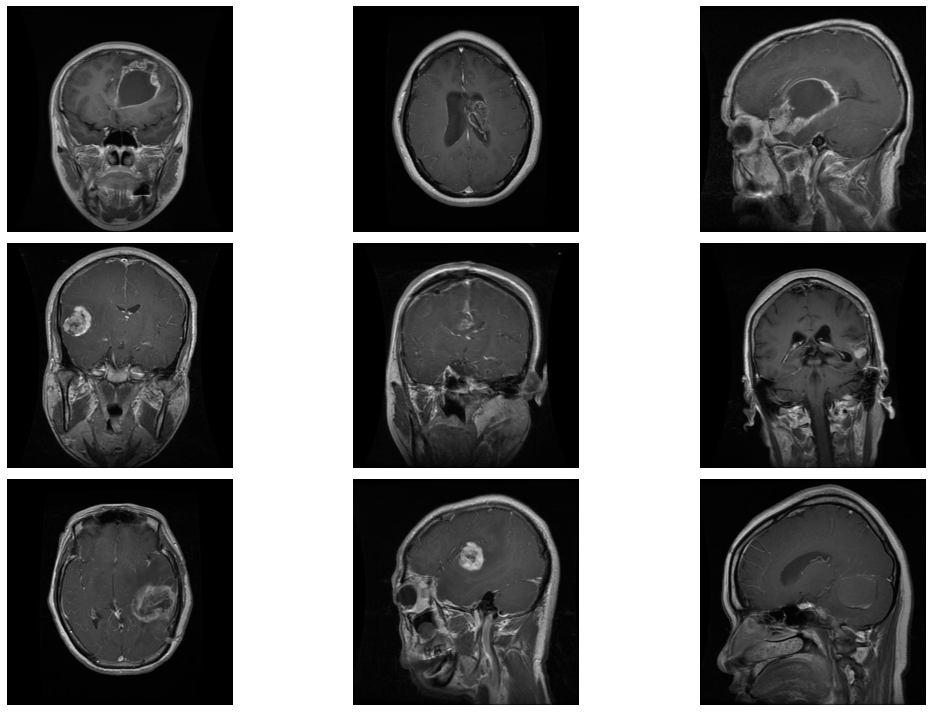

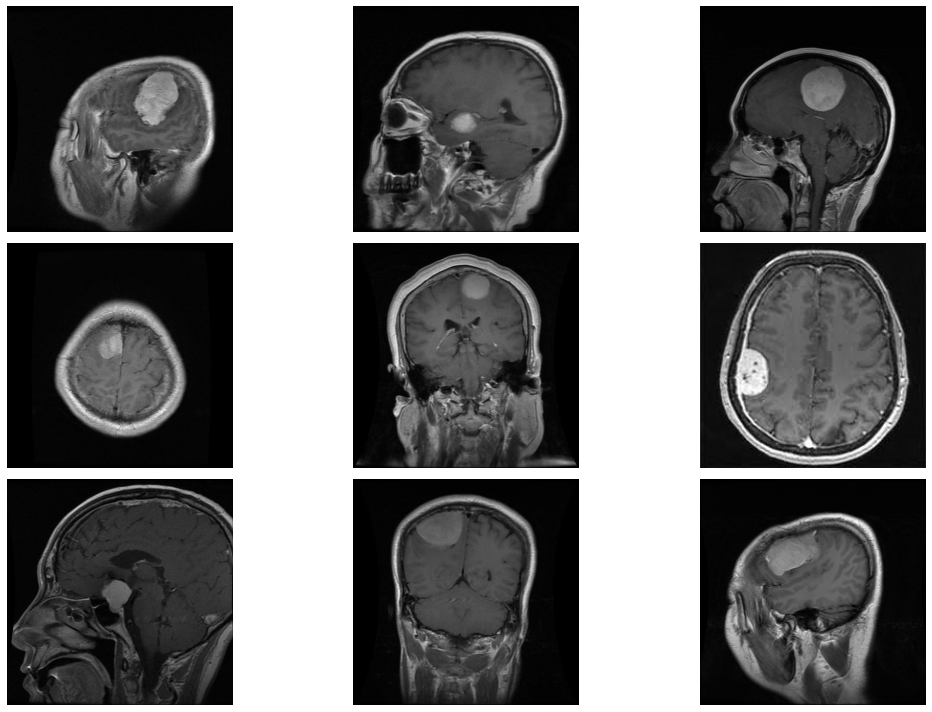

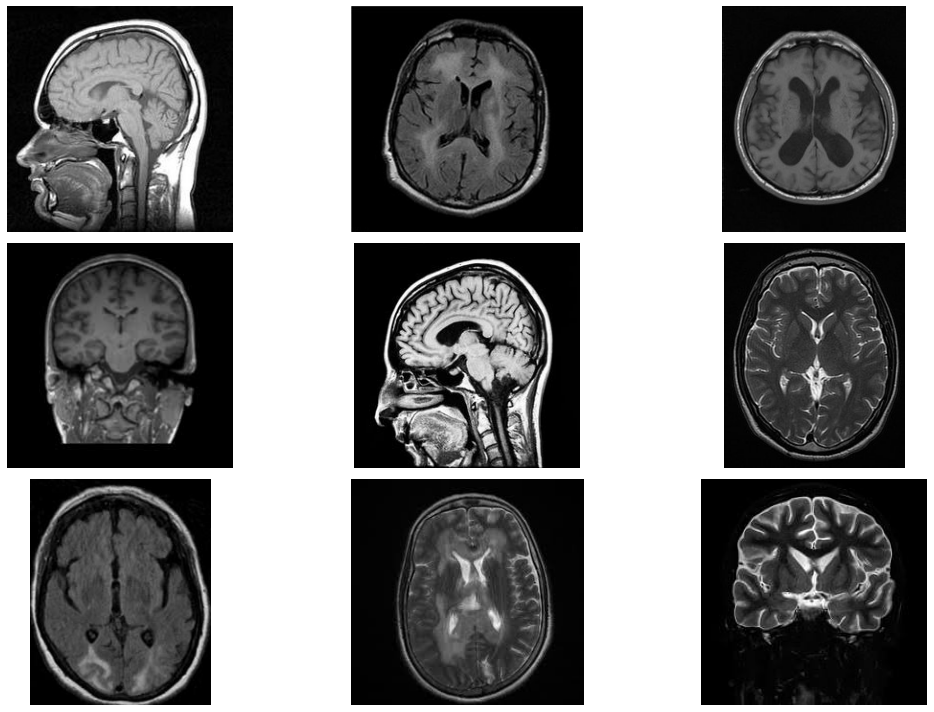

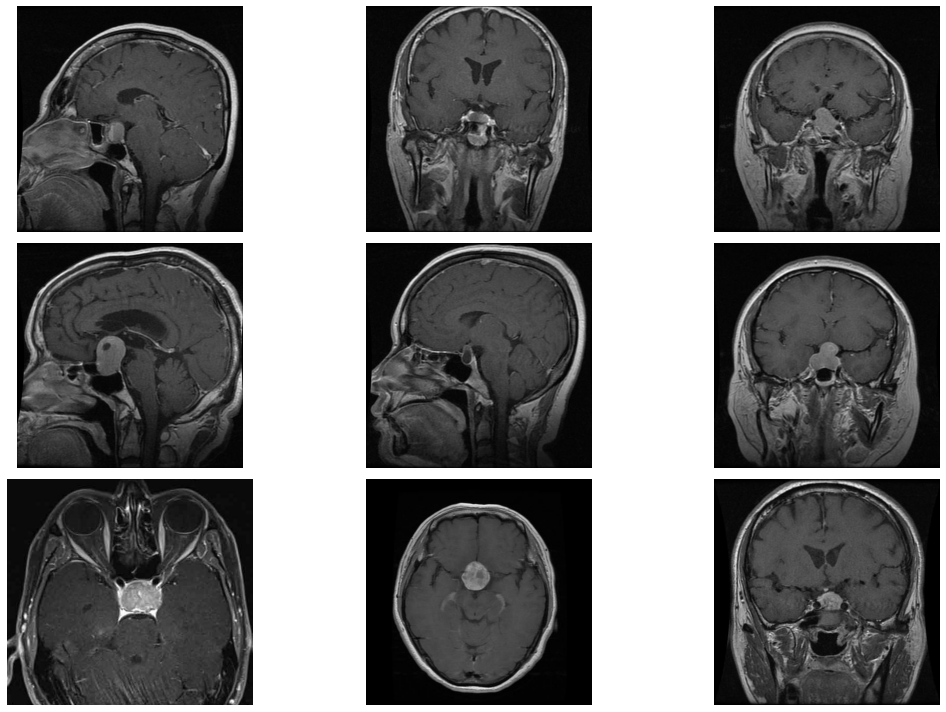

In [4]:
import os

glioma_tumor_dir='/Users/aviral/Documents/programming/datas/images/brain tumor/Training/glioma_tumor'
plot_images(glioma_tumor_dir)

meningioma_tumor_dir='/Users/aviral/Documents/programming/datas/images/brain tumor/Training/meningioma_tumor'
plot_images(meningioma_tumor_dir)

no_tumor_dir='/Users/aviral/Documents/programming/datas/images/brain tumor/Training/no_tumor'
plot_images(no_tumor_dir)

pituitary_tumor_dir='/Users/aviral/Documents/programming/datas/images/brain tumor/Training/pituitary_tumor'
plot_images(pituitary_tumor_dir)

In [5]:
import cv2 

X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/Users/aviral/Documents/programming/datas/images/brain tumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/Users/aviral/Documents/programming/datas/images/brain tumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

In [8]:
import tensorflow as tf

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [9]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,min_delta=1e-7,restore_best_weights=True)
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=.2,patience=3,min_delta=1e-7)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

def build_model(input_shape):
    
    inputs=keras.layers.Input(input_shape)
    # Block 1
    x=keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='valid')(inputs)
    x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Activation('relu')(x)
    x=keras.layers.MaxPool2D()(x)
    x=keras.layers.Dropout(.2)(x)
    
    #Block 2
    x=keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid')(x)
    x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Activation('relu')(x)
    x=keras.layers.MaxPool2D()(x)
    x=keras.layers.Dropout(.2)(x)
    
    #Block 3
    x=keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='valid')(x)
    x=keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='valid')(x)
    x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Activation('relu')(x)
    x=keras.layers.MaxPool2D()(x)
    x=keras.layers.Dropout(.4)(x)
    
    # Head
    x=keras.layers.Flatten()(x)
    x=keras.layers.Dense(64,activation='relu')(x)
    x=keras.layers.Dropout(.5)(x)
    # final layer
    output=keras.layers.Dense(4,activation='softmax')(x)
    
    model=keras.Model(inputs,output)
    
    return model

In [18]:
model=build_model((150,150,3))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics='accuracy')
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_9 (Batch (None, 148, 148, 16)      64        
_________________________________________________________________
activation_9 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640

In [19]:
history=model.fit(X_train,y_train,epochs=50,validation_split=.1,callbacks=[early_stopping,reduce_lr])

Epoch 1/50


2022-05-12 12:58:54.023284: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-12 12:58:54.025617: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-12 12:59:02.242739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - ETA: 0s - loss: 2.8379 - accuracy: 0.2990

2022-05-12 12:59:10.363765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 17s 60ms/step - loss: 2.8250 - accuracy: 0.2994 - val_loss: 1.4498 - val_accuracy: 0.2313
Epoch 2/50
83/83 [==============================] - 3s 35ms/step - loss: 1.2278 - accuracy: 0.3898 - val_loss: 0.9941 - val_accuracy: 0.6088
Epoch 3/50
83/83 [==============================] - 3s 36ms/step - loss: 1.1746 - accuracy: 0.4611 - val_loss: 0.8918 - val_accuracy: 0.6054
Epoch 4/50
83/83 [==============================] - 3s 35ms/step - loss: 1.1247 - accuracy: 0.4601 - val_loss: 0.9270 - val_accuracy: 0.5408
Epoch 5/50
83/83 [==============================] - 3s 35ms/step - loss: 1.0648 - accuracy: 0.4758 - val_loss: 0.8602 - val_accuracy: 0.5102
Epoch 6/50
83/83 [==============================] - 3s 36ms/step - loss: 1.0587 - accuracy: 0.4588 - val_loss: 0.7741 - val_accuracy: 0.6735
Epoch 7/50
83/83 [==============================] - 3s 35ms/step - loss: 0.9786 - accuracy: 0.5121 - val_loss: 0.8125 - val_accuracy: 0.6429
Epoch 8/50
83/83 [=====